# Chapter 1: Introduction

In our strategy, we are utilizing a surrogate dataset from a comparable corporate environment, in the absence of proprietary data. This method will enable us to demonstrate potential analytical solutions that can be adapted to similar contexts.

The dataset we are using is the IBM HR Analytics Employee Attrition & Performance dataset, which is available on Kaggle. It provides a valuable simulation for our analysis, offering insights that could be useful in the development of models for similar corporate environments.

For a comprehensive overview of the dataset, please refer to: [IBM HR Analytics Employee Attrition & Performance](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data)

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('IBM HR Employee Attrition.csv')

# Identifying columns where all values are the same
constant_columns = [col for col in data.columns if data[col].nunique() == 1]

# Display constant columns
print(constant_columns)
print(data.shape)

['EmployeeCount', 'Over18', 'StandardHours']
(1470, 35)


Prior to delving into the nuances of data analysis, it is crucial to refine the dataset by removing features that offer no discernible variation. Features with uniform values across all entries fail to contribute to the predictive power of models and are hence redundant. In our current dataset, the following columns exhibit this characteristic:

'EmployeeCount'
'Over18'
'StandardHours'

These columns will be excluded from the dataset to ensure that our subsequent analyses and models are influenced only by variables that provide meaningful information.

In [2]:
data_cleaned = data.drop(columns=constant_columns + ['EmployeeNumber'])

# Display the first few rows of the cleaned dataset to confirm changes
display(data_cleaned.head())
print(data_cleaned.shape)
#A total of 4 columns will be dropped

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


(1470, 31)


In [3]:
# Check for null values in all columns
null_values = data_cleaned.isnull().sum()
print(null_values)

# Performing value_counts on each column
value_counts_summary = {column: data_cleaned[column].value_counts() for column in data_cleaned.columns}
print(value_counts_summary)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64
{'Age': Age
35    78
34    77
36    69
31    69
29    68


The dataset has no missing values and inconsistencies. We can proceed on the next steps of our anlaysis.

## Comprehensive Analytical Framework

The analysis will be meticulously segmented into five distinct sections, each tailored to undergo a dedicated process of data preprocessing, dataset partitioning, model development, and rigorous evaluation. This structured segmentation is conceived to address specific focal points of the analysis:

1. **Predicting Employee Attrition:** This segment focuses on modeling and understanding the factors that influence employee turnover. This analysis is crucial in assessing the alignment between organizational objectives and the aspirations of potential talents, especially in the context of internal recruitment. This approach is not only relevant to specific organizations but also provides insights applicable to various corporate environments.

2. **Predicting Relationship Satisfaction:** In this section, we forecast the level of employees' contentment with their workplace relationships, a facet that significantly impacts their collaboration and team dynamics.

3. **Predicting Job Satisfaction:** This analysis will delve into the factors contributing to employees' job contentment, a key indicator of their engagement and overall job performance.

4. **Predicting Work-Life Balance:** We will explore the elements that balance professional responsibilities with personal life, an essential aspect of a healthy work environment that fosters employee well-being.

5. **Predicting Job Roles:** The final segment focuses on identifying the most suitable job roles for employees based on a set of influential variables. This will involve an in-depth feature analysis and elimination process to pinpoint the key attributes that best define the alignment of job roles with employee skills and competencies.

Each section will not only contribute to a holistic understanding of employee dynamics within the organization but will also serve as a strategic tool in evaluating the soft skills and capabilities of talents. A well-balanced work life, coupled with job satisfaction, are indicators of an employee's potential and adaptability, as underscored by recent studies [Susanto et al., 2022](https://consensus.app/papers/worklife-balance-satisfaction-performance-smes-susanto/9156c1754a74591e911a0d6449df09a7). The in-depth examination in section five will further illuminate the pathways to optimal job role assignments, ensuring a harmonious and productive workplace.

## Section 1: Predicting Employee Attrition

In [4]:
# Spitting the dataset
from sklearn.model_selection import train_test_split

# Define the target variable 'y' and features 'X'
y = data_cleaned['Attrition']
X = data_cleaned.drop('Attrition', axis=1)

# Splitting the dataset into training and testing sets, stratified based on the 'Attrition' column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Displaying the shapes of the training and testing sets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((1176, 30), (294, 30), (1176,), (294,))

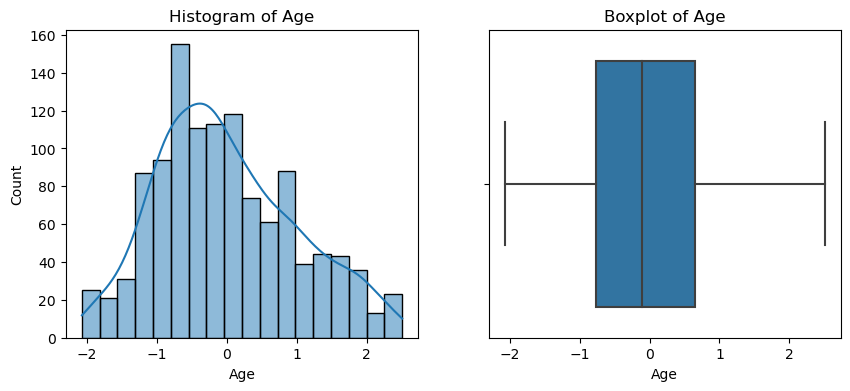

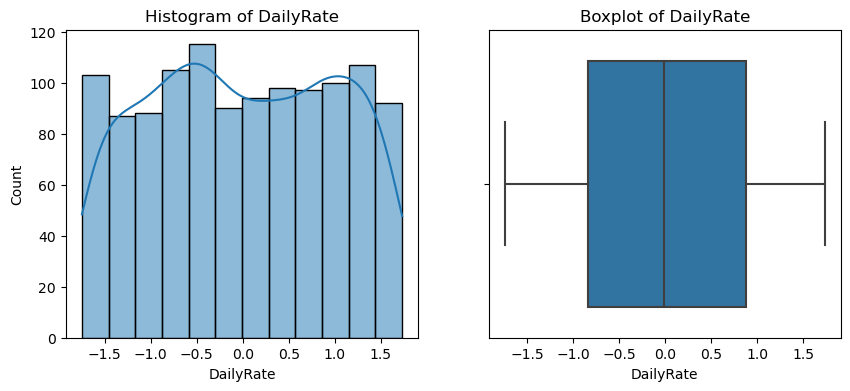

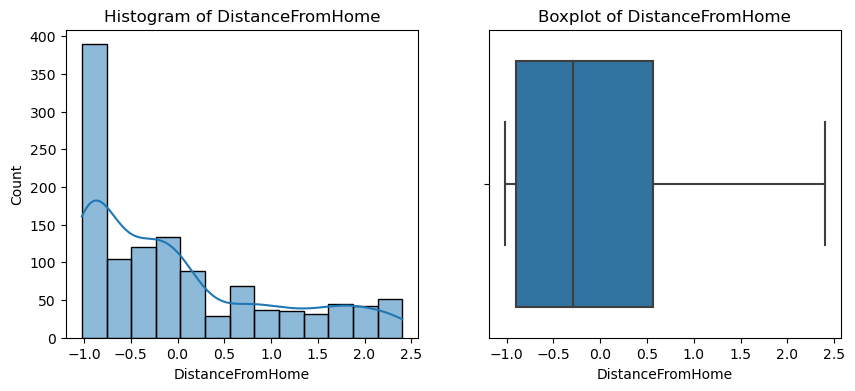

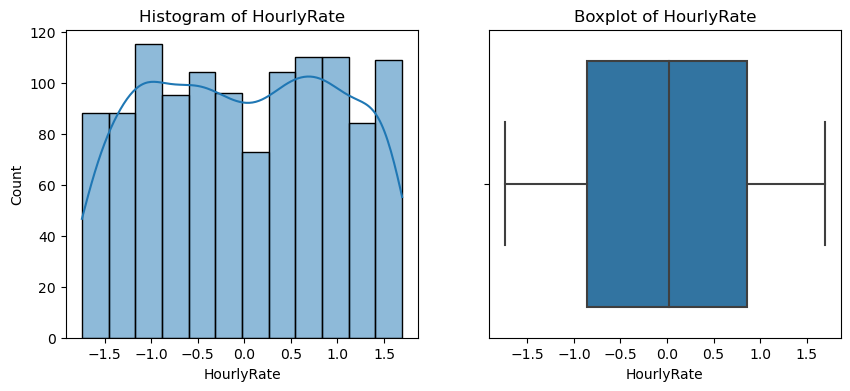

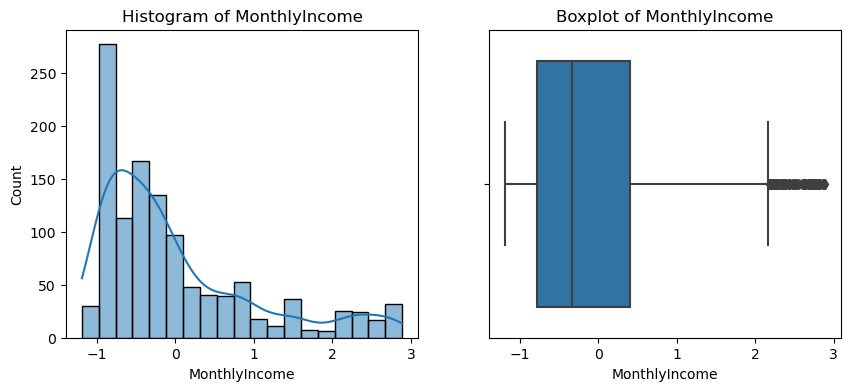

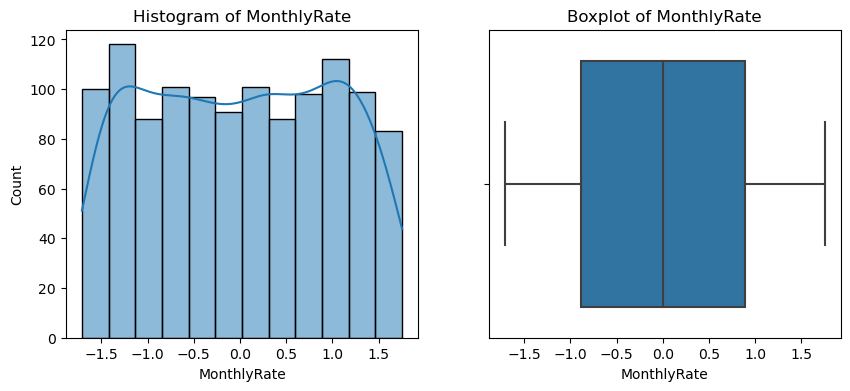

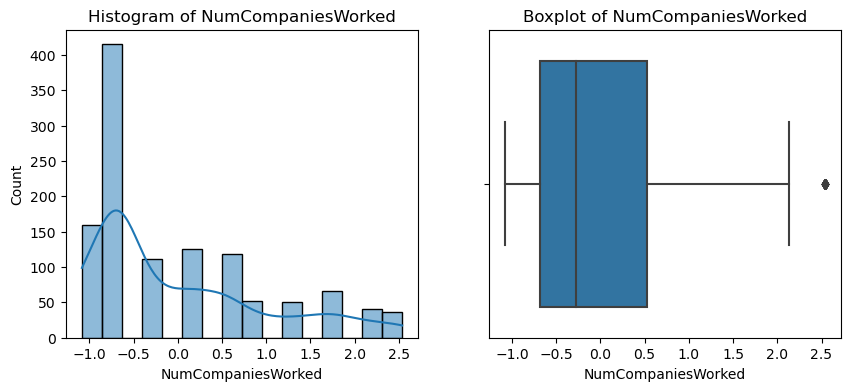

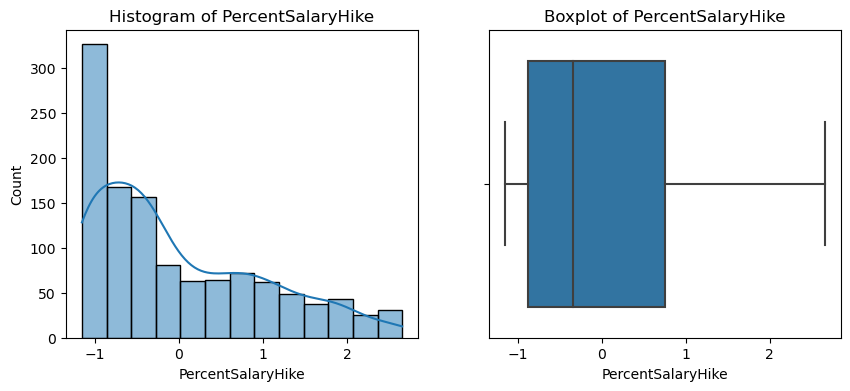

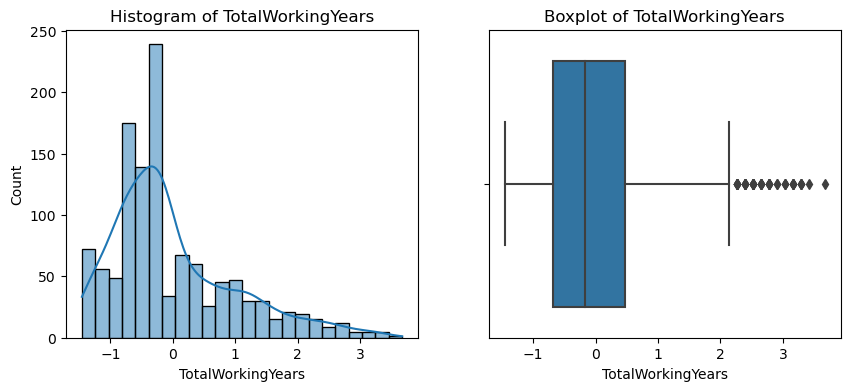

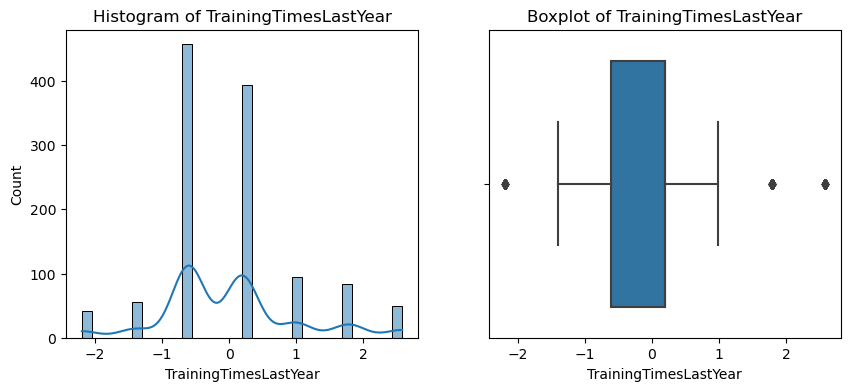

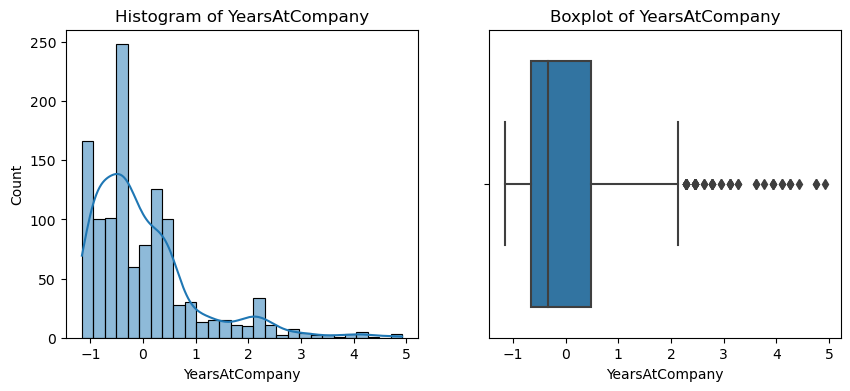

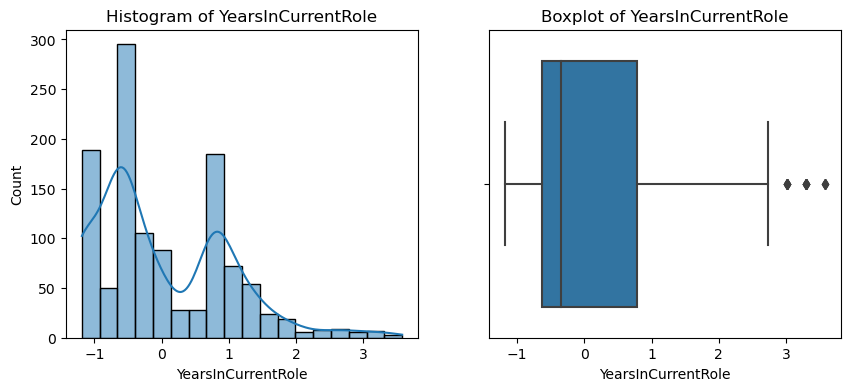

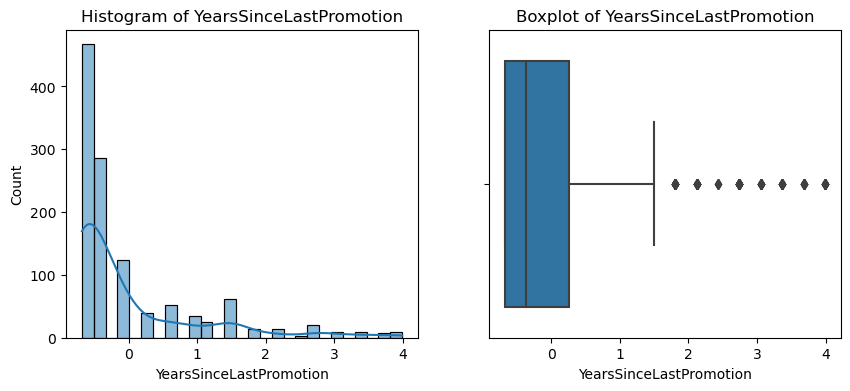

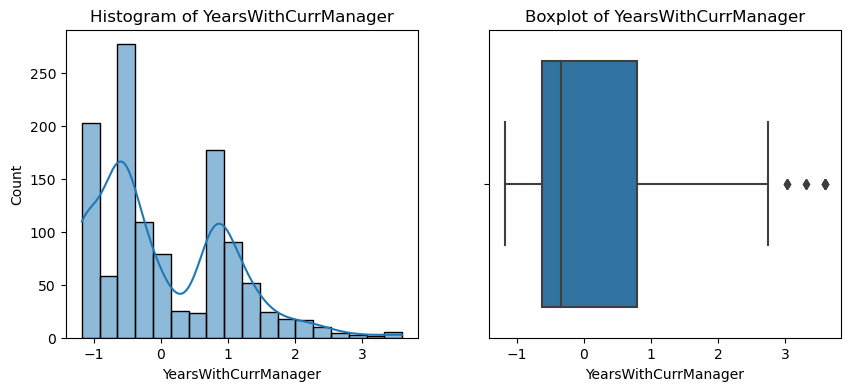

In [5]:
# Standardizing numerical vairables and one hot encoding categorical variables
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical and categorical columns
numerical_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 
                  'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 
                  'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 
                  'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 
                  'YearsWithCurrManager']
categorical_cols = ['BusinessTravel', 'Department', 'Education', 'EducationField', 
                    'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 
                    'JobRole', 'JobSatisfaction', 'MaritalStatus', 'PerformanceRating', 
                    'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance','OverTime']

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Fit and transform the training data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Convert processed data back to DataFrame for visualization
column_names = preprocessor.named_transformers_['num'].get_feature_names_out(numerical_cols)
column_names = np.append(column_names, preprocessor.named_transformers_['cat'].get_feature_names_out())
X_train_processed_df = pd.DataFrame(X_train_processed, columns=column_names)

# Visualization of Numerical Variables (after standardization but before removing outliers)
for col in column_names[:len(numerical_cols)]:
    plt.figure(figsize=(10, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(X_train_processed_df[col], kde=True)
    plt.title(f'Histogram of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=X_train_processed_df[col])
    plt.title(f'Boxplot of {col}')

    plt.show()

We will train and evaluate models using Logistic Regression, Random Forest Classifier, SVM, and KNN on data that includes outliers. This approach aims to assess the impact of outliers on each model, leveraging Random Forest's known robustness to outliers as a benchmark for comparison. Through this method, we will determine the significance of outliers on model performance based on specific metrics.

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the models
log_reg = LogisticRegression(max_iter=10000)  # Increased max_iter
rf_clf = RandomForestClassifier(n_estimators=500)
svm_clf = SVC(probability=True)  # Set probability=True for AUC-ROC
knn_clf = KNeighborsClassifier()

# Train the models
log_reg.fit(X_train_processed, y_train_encoded)
rf_clf.fit(X_train_processed, y_train_encoded)
svm_clf.fit(X_train_processed, y_train_encoded)
knn_clf.fit(X_train_processed, y_train_encoded)

models = [log_reg, rf_clf, svm_clf, knn_clf]
model_names = ["Logistic Regression", "Random Forest", "SVM", "KNN"]
performance_metrics = {"Accuracy": accuracy_score, "F1-Score": f1_score, "AUC-ROC": roc_auc_score}
results = {name: [] for name in model_names}

for model, name in zip(models, model_names):
    predictions = model.predict(X_test_processed)
    probabilities = model.predict_proba(X_test_processed)[:, 1]
    for metric_name, metric_func in performance_metrics.items():
        if metric_name == "AUC-ROC":
            score = metric_func(y_test_encoded, probabilities)
        else:
            score = metric_func(y_test_encoded, predictions)
        results[name].append(score)

# Convert results to DataFrame
results_df = pd.DataFrame(results, index=performance_metrics.keys())

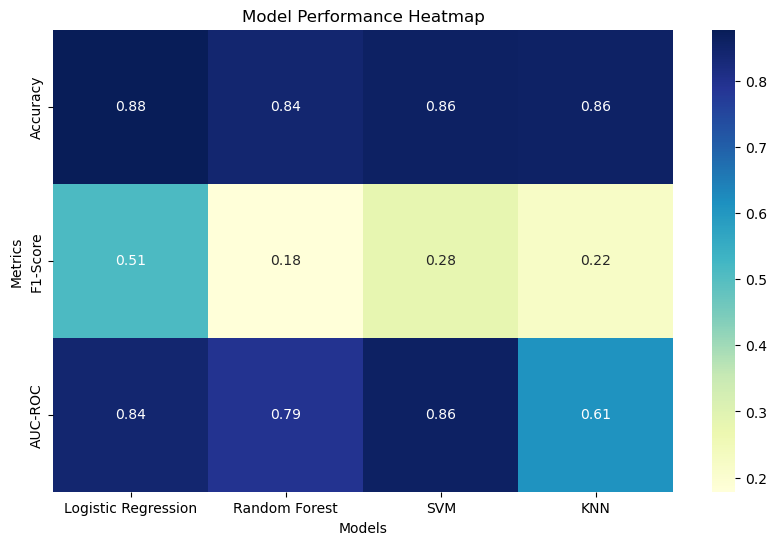

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(results_df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Model Performance Heatmap")
plt.ylabel("Metrics")
plt.xlabel("Models")
plt.show()

## Model Performance Analysis

Upon visual inspection of the performance heatmap for four machine learning models, we derive the following insights:

### Accuracy:
- Logistic Regression and SVM exhibit the highest accuracy (0.88 - 0.86), indicating their superior capability in correct predictions of both classes.
- Random Forest follows closely with an accuracy of ~0.84, while KNN matches this but may be less reliable due to its lower AUC-ROC score.

### F1-Score:
- Logistic Regression leads with an F1-score of 0.51, suggesting it has the best balance between precision and recall among the models.
- The other models have notably lower F1-scores, with Random Forest at 0.18, SVM at 0.28, and KNN at 0.22, which could indicate a less effective balance in classification performance for positive and negative instances.

### AUC-ROC:
- SVM shows the best AUC-ROC score at 0.86, with Logistic Regression close behind at 0.84, both indicating strong discriminative abilities between class probabilities.
- Random Forest's AUC-ROC score is 0.81, which is respectable but less than the leading SVM and Logistic Regression.
- KNN lags with an AUC-ROC score of 0.61, implying a comparatively weaker capability in distinguishing between the classes.

## Conclusions:

- **Logistic Regression** demonstrates robustness across all metrics, with the highest F1-score, indicative of its strong predictive performance and class balance.
- **SVM** shows competitive accuracy and the best AUC-ROC, suggesting excellent class separation capabilities.
- **Random Forest** and **KNN**, while exhibiting decent accuracy, fall short in terms of F1-score and AUC-ROC, signaling potential limitations in their precision, recall, or both.

## Insights:

- The addition of the `OverTime` feature appears to have influenced the models' capabilities, especially boosting the performance of Logistic Regression in terms of F1-score.
- Logistic Regression's performance, strong across all metrics, may indicate that the linearity assumption holds well for this dataset, and that features including `OverTime` contribute significantly to the prediction of the target variable.
- Given SVM's performance, especially in AUC-ROC, it is evident that the margin-based approach of SVM is effective for this particular problem, even in the presence of potential outliers and class imbalance.
- The lower performance of KNN in AUC-ROC could be attributed to its sensitivity to feature scales and distribution, reinforcing the importance of feature selection and preprocessing.

**Note:** To ensure these models' robustness, further validation such as cross-validation should be employed. Hyperparameter tuning could potentially enhance model performance. In addition, the business context and the cost of different types of classification errors should be carefully considered when selecting the final model for deployment.

## Section 2: Predicting Employee Relationship Satisfaction

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define the target variable 'y' and features 'X'
y = data_cleaned['RelationshipSatisfaction']
X = data_cleaned.drop(['RelationshipSatisfaction'], axis=1)

# Numerical and categorical columns as provided
numerical_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 
                  'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 
                  'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 
                  'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 
                  'YearsWithCurrManager']
categorical_cols = ['BusinessTravel', 'Department', 'Education', 'EducationField', 
                    'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 
                    'JobRole', 'JobSatisfaction', 'MaritalStatus', 'PerformanceRating', 
                    'Attrition', 'StockOptionLevel', 'WorkLifeBalance', 'OverTime']

# Split the dataset into training and testing sets with stratification
X_train_rel, X_test_rel, y_train_rel, y_test_rel = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Fit and transform the training data
X_train_rel_processed = preprocessor.fit_transform(X_train_rel)

# Transform the test data
X_test_rel_processed = preprocessor.transform(X_test_rel)

Since Relationship Satisfaction is of ordinal type of data, instead of using classifier models, we will be using ordinal regression models, for that cases we will be using the "mord" library to handle such cases. We will be using MAE, F1 score micro and macro as our metrics. To evaluate the performance we will be comparing our trained model to a dummy model which will give random predictions as compared to the models we have trained.

In [9]:
import mord
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, f1_score, accuracy_score
from sklearn.dummy import DummyClassifier

models = {
    'LogisticIT': mord.LogisticIT(alpha=1.0),
    'LogisticAT': mord.LogisticAT(alpha=1.0),
    'OrdinalRidge': mord.OrdinalRidge(alpha=1.0),
    'LAD': mord.LAD(dual=True),
    'Dummy':DummyClassifier(strategy='uniform', random_state=42)
}

for name, model in models.items():
    model.fit(X_train_rel_processed, y_train_rel)
    

accuracy_f1_results = {}
mae_results = {}

for name, model in models.items():
    predictions = model.predict(X_test_rel_processed)
    accuracy_f1_results[name] = {
        'Accuracy': accuracy_score(y_test_rel, predictions),
        'F1-Score Macro': f1_score(y_test_rel, predictions, average='macro'),
        'F1-Score Micro': f1_score(y_test_rel, predictions, average='micro')
    }
    mae_results[name] = {
        'MAE': mean_absolute_error(y_test_rel, predictions)
    }
    
# Convert the dictionaries to dataframes
accuracy_f1_df = pd.DataFrame(accuracy_f1_results)
mae_df = pd.DataFrame(mae_results)

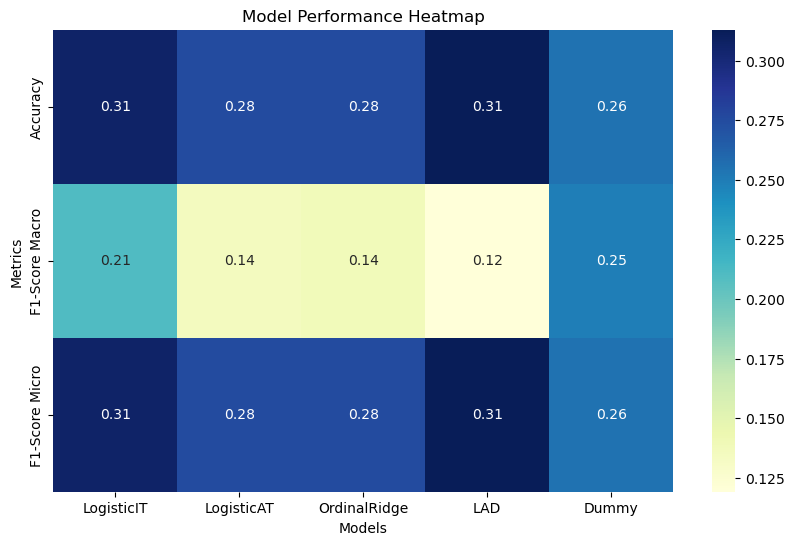

In [10]:
# Visualize the accuracy_f1_results in a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(accuracy_f1_df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Model Performance Heatmap")
plt.ylabel("Metrics")
plt.xlabel("Models")
plt.show()

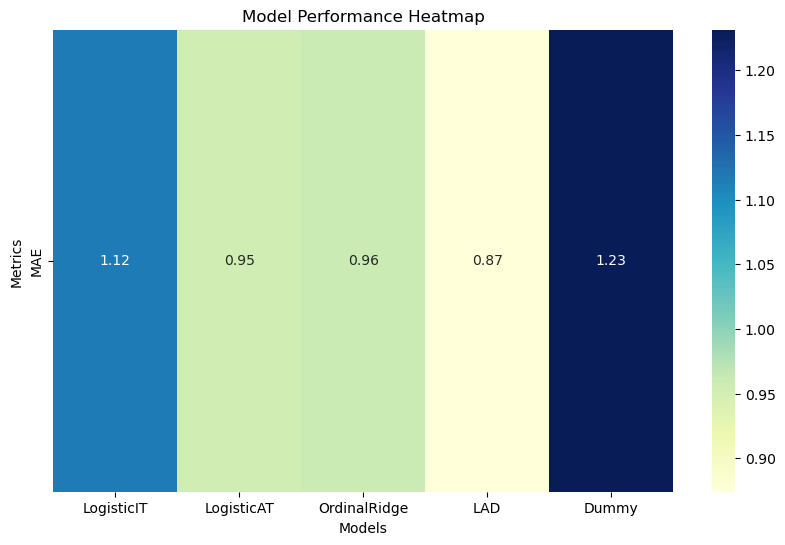

In [11]:
# Visualize the mae_results in a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(mae_df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Model Performance Heatmap")
plt.ylabel("Metrics")
plt.xlabel("Models")
plt.show()

Upon reviewing the initial model performances, it has become evident that the predictive accuracy does not surpass the baseline of random chance in class differentiation. This indicates an opportunity for us to reallocate our analytical efforts towards other key areas of the dataset that may yield more actionable insights.

We will proceed to concentrate on developing models to predict other crucial variables that could be instrumental in understanding the dynamics within the organization. 

## Section 3: Predicting Job Satisfaction

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define the target variable 'y' and features 'X'
y = data_cleaned['JobSatisfaction']
X = data_cleaned.drop(['JobSatisfaction'], axis=1)

# Numerical and categorical columns as provided
numerical_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 
                  'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 
                  'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 
                  'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 
                  'YearsWithCurrManager']
categorical_cols = ['BusinessTravel', 'Department', 'Education', 'EducationField', 
                    'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 
                    'JobRole', 'RelationshipSatisfaction', 'MaritalStatus', 'PerformanceRating', 
                    'Attrition', 'StockOptionLevel', 'WorkLifeBalance', 'OverTime']

# Split the dataset into training and testing sets with stratification
X_train_rel, X_test_rel, y_train_rel, y_test_rel = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Fit and transform the training data
X_train_rel_processed = preprocessor.fit_transform(X_train_rel)

# Transform the test data
X_test_rel_processed = preprocessor.transform(X_test_rel)

In [13]:
models = {
    'LogisticIT': mord.LogisticIT(alpha=1.0),
    'LogisticAT': mord.LogisticAT(alpha=1.0),
    'OrdinalRidge': mord.OrdinalRidge(alpha=1.0),
    'LAD': mord.LAD(dual=True),
    'Dummy':DummyClassifier(strategy='uniform', random_state=42)
}

for name, model in models.items():
    model.fit(X_train_rel_processed, y_train_rel)
    

accuracy_f1_results = {}
mae_results = {}

for name, model in models.items():
    predictions = model.predict(X_test_rel_processed)
    accuracy_f1_results[name] = {
        'Accuracy': accuracy_score(y_test_rel, predictions),
        'F1-Score Macro': f1_score(y_test_rel, predictions, average='macro'),
        'F1-Score Micro': f1_score(y_test_rel, predictions, average='micro')
    }
    mae_results[name] = {
        'MAE': mean_absolute_error(y_test_rel, predictions)
    }
    
# Convert the dictionaries to dataframes
accuracy_f1_df = pd.DataFrame(accuracy_f1_results)
mae_df = pd.DataFrame(mae_results)

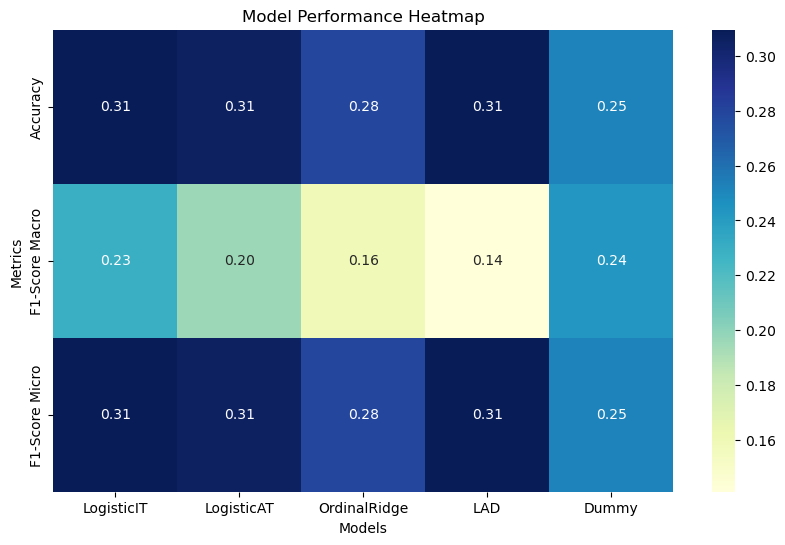

In [14]:
# Visualize the accuracy_f1_results in a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(accuracy_f1_df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Model Performance Heatmap")
plt.ylabel("Metrics")
plt.xlabel("Models")
plt.show()

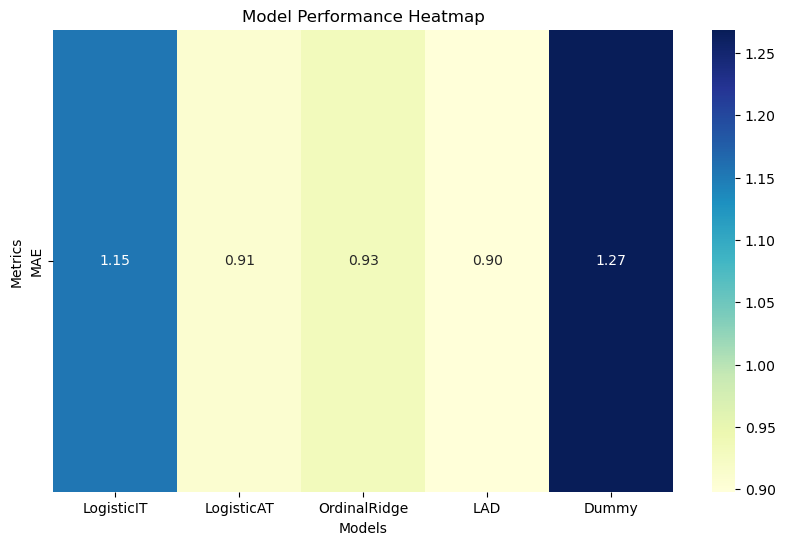

In [15]:
# Visualize the mae_results in a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(mae_df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Model Performance Heatmap")
plt.ylabel("Metrics")
plt.xlabel("Models")
plt.show()

The visualizations indicate that the models trained to predict job satisfaction are not substantially outperforming a model that guesses randomly when it comes to distinguishing between classes. Despite efforts in feature engineering and hyperparameter tuning, the results have not shown significant improvement. Consequently, we will proceed to analyze the prediction of work-life balance.

## Section 4: Predicting Work Life Balance

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define the target variable 'y' and features 'X'
y = data_cleaned['WorkLifeBalance']
X = data_cleaned.drop(['WorkLifeBalance'], axis=1)

# Numerical and categorical columns as provided
numerical_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 
                  'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 
                  'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 
                  'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 
                  'YearsWithCurrManager']
categorical_cols = ['BusinessTravel', 'Department', 'Education', 'EducationField', 
                    'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 
                    'JobRole', 'RelationshipSatisfaction', 'MaritalStatus', 'PerformanceRating', 
                    'Attrition', 'StockOptionLevel', 'JobSatisfaction', 'OverTime']

# Split the dataset into training and testing sets with stratification
X_train_rel, X_test_rel, y_train_rel, y_test_rel = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Fit and transform the training data
X_train_rel_processed = preprocessor.fit_transform(X_train_rel)

# Transform the test data
X_test_rel_processed = preprocessor.transform(X_test_rel)

In [17]:
models = {
    'LogisticIT': mord.LogisticIT(alpha=1.0),
    'LogisticAT': mord.LogisticAT(alpha=1.0),
    'OrdinalRidge': mord.OrdinalRidge(alpha=1.0),
    'LAD': mord.LAD(dual=True),
    'Dummy':DummyClassifier(strategy='uniform', random_state=42)
}

for name, model in models.items():
    model.fit(X_train_rel_processed, y_train_rel)
    

accuracy_f1_results = {}
mae_results = {}

for name, model in models.items():
    predictions = model.predict(X_test_rel_processed)
    accuracy_f1_results[name] = {
        'Accuracy': accuracy_score(y_test_rel, predictions),
        'F1-Score Macro': f1_score(y_test_rel, predictions, average='macro'),
        'F1-Score Micro': f1_score(y_test_rel, predictions, average='micro')
    }
    mae_results[name] = {
        'MAE': mean_absolute_error(y_test_rel, predictions)
    }
    
# Convert the dictionaries to dataframes
accuracy_f1_df = pd.DataFrame(accuracy_f1_results)
mae_df = pd.DataFrame(mae_results)

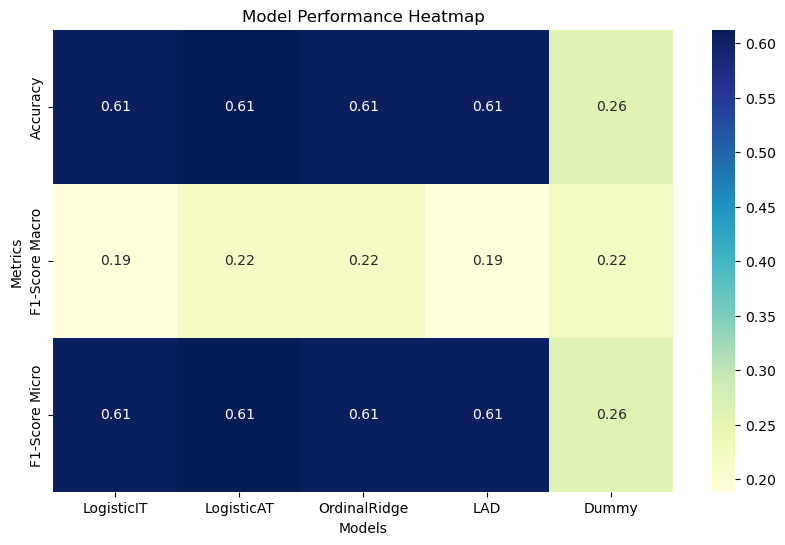

In [18]:
# Visualize the accuracy_f1_results in a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(accuracy_f1_df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Model Performance Heatmap")
plt.ylabel("Metrics")
plt.xlabel("Models")
plt.show()

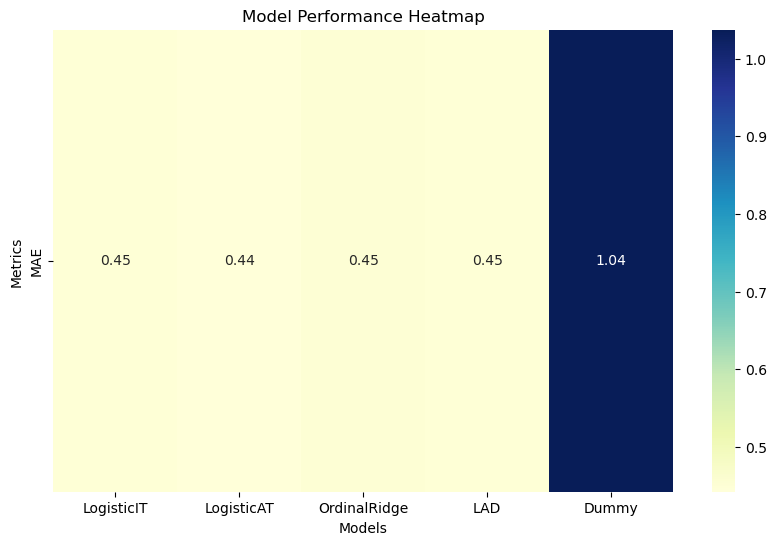

In [19]:
# Visualize the mae_results in a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(mae_df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Model Performance Heatmap")
plt.ylabel("Metrics")
plt.xlabel("Models")
plt.show()

The provided visualization suggests that our predictive models significantly outperform random chance in distinguishing between classes. This enhancement in model performance bolsters our ability to accurately estimate employees' work-life balance.

## Section 5: Predicting Job Roles

In this section, we will focus on developing a predictive model to identify the most suitable job roles for talent within the company, aligning employee strengths with organizational needs.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
import pandas as pd

# Define the target variable 'y' and features 'X'
y = data_cleaned['JobRole']
X = data_cleaned.drop('JobRole', axis=1)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# List of numerical and categorical columns
numerical_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 
                  'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 
                  'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 
                  'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 
                  'YearsWithCurrManager']
categorical_cols = ['BusinessTravel', 'Department', 'Education', 'EducationField', 
                    'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
                    'JobSatisfaction', 'MaritalStatus', 'PerformanceRating', 
                    'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance','OverTime']

# Select only the specified numerical and categorical columns
X_train = X_train[numerical_cols + categorical_cols]
X_test = X_test[numerical_cols + categorical_cols]

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Fit and transform the training data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Get feature names from one hot encoder and numerical features
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
feature_names = np.concatenate([numerical_cols, ohe_feature_names])

# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [21]:
from sklearn.feature_selection import RFECV

# Initialize RFE with a logistic regression estimator
rfe = RFECV(estimator=LogisticRegression(max_iter=10000), step=1, cv=5, scoring='accuracy')

# Fit RFE
rfe.fit(X_train_processed, y_train_encoded)

# Get the support array (True if a feature is selected, False otherwise)
selected_features = rfe.support_

# Get the ranking of features
ranking_features = rfe.ranking_

# Print the features selected by RFE
print("Features selected by RFE:")
for i, (feature, selected, rank) in enumerate(zip(feature_names, selected_features, ranking_features)):
    if selected:
        print(f"Rank {rank}: {feature}")

Features selected by RFE:
Rank 1: MonthlyIncome
Rank 1: TotalWorkingYears
Rank 1: Department_Human Resources
Rank 1: Department_Research & Development
Rank 1: Department_Sales
Rank 1: Education_5
Rank 1: EducationField_Technical Degree
Rank 1: JobLevel_1
Rank 1: JobLevel_2
Rank 1: JobLevel_3
Rank 1: JobLevel_4
Rank 1: PerformanceRating_3
Rank 1: WorkLifeBalance_1


For effective model training aimed at predicting job roles, we will concentrate on the most relevant features identified through prior results and enhance the feature set with additional variables informed by domain expertise. This targeted approach seeks to refine the predictive accuracy by focusing on significant predictors.

In [22]:
# List of numerical and categorical columns
numerical_cols = ['Education', 'JobLevel', 'MonthlyIncome', 'TotalWorkingYears' ,'PerformanceRating', 'WorkLifeBalance']
categorical_cols = ['Department', 'EducationField']

# Select only the specified numerical and categorical columns
X_train = X_train[numerical_cols + categorical_cols]
X_test = X_test[numerical_cols + categorical_cols]

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Fit and transform the training data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Get feature names from one hot encoder and numerical features
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
feature_names = np.concatenate([numerical_cols, ohe_feature_names])

# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [23]:
from sklearn.preprocessing import label_binarize

# Initialize the models
log_reg = LogisticRegression(max_iter=10000)  # Increased max_iter
rf_clf = RandomForestClassifier(n_estimators=500)
svm_clf = SVC(probability=True)  # Set probability=True for AUC-ROC
knn_clf = KNeighborsClassifier()

# Train the models
log_reg.fit(X_train_processed, y_train_encoded)
rf_clf.fit(X_train_processed, y_train_encoded)
svm_clf.fit(X_train_processed, y_train_encoded)
knn_clf.fit(X_train_processed, y_train_encoded)

models = [log_reg, rf_clf, svm_clf, knn_clf]
model_names = ["Logistic Regression", "Random Forest", "SVM", "KNN"]
performance_metrics = {
    "Accuracy": accuracy_score,
    "F1-Score Macro": lambda y_true, y_pred: f1_score(y_true, y_pred, average='macro'),
    "F1-Score Micro": lambda y_true, y_pred: f1_score(y_true, y_pred, average='micro'),
    # Use a One-vs-Rest approach for multiclass AUC-ROC
    "AUC-ROC": lambda y_true, y_prob: roc_auc_score(label_binarize(y_true, classes=sorted(set(y_true))), y_prob, multi_class='ovr', average='macro')
}
results = {name: [] for name in model_names}

for model, name in zip(models, model_names):
    predictions = model.predict(X_test_processed)
    probabilities = model.predict_proba(X_test_processed)
    for metric_name, metric_func in performance_metrics.items():
        if metric_name == "AUC-ROC":
            score = metric_func(y_test_encoded, probabilities)
        else:
            score = metric_func(y_test_encoded, predictions)
        results[name].append(score)

# Convert results to DataFrame
results_df = pd.DataFrame(results, index=performance_metrics.keys())

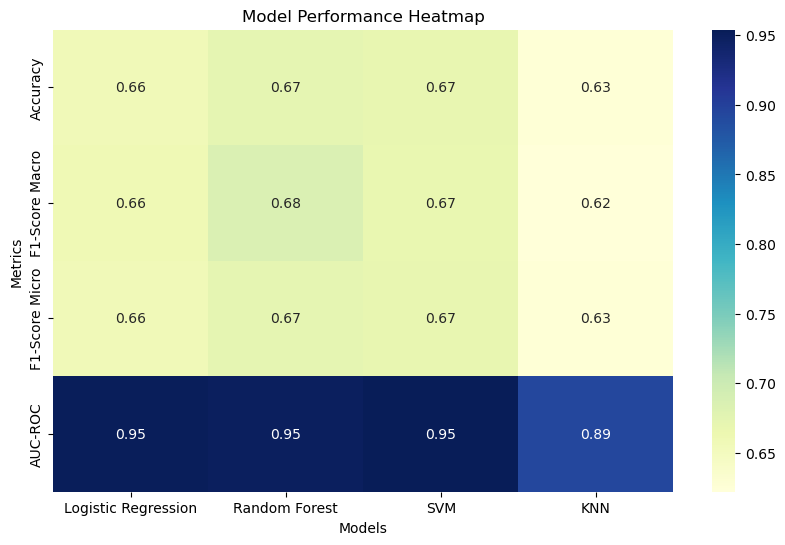

In [24]:
# Visualize the accuracy_f1_results in a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(results_df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Model Performance Heatmap")
plt.ylabel("Metrics")
plt.xlabel("Models")
plt.show()

The visualization indicates that while the accuracy for multi-class classification is modest, the AUC-ROC scores are promising, suggesting that the models are capable of effectively distinguishing between classes across varying thresholds. This provides a solid foundation for further investigation into clustering approaches, which may yield insightful segments of the dataset corresponding to the most suitable job roles for each talent or employee. Moving forward with unsupervised machine learning models could uncover meaningful patterns and groupings that support talent allocation and internal mobility strategies.

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 543, ncost: 576801153.1104358
Run: 1, iteration: 2/100, moves: 148, ncost: 532260332.38982964
Run: 1, iteration: 3/100, moves: 57, ncost: 520320914.93970054
Run: 1, iteration: 4/100, moves: 36, ncost: 514868694.56486464
Run: 1, iteration: 5/100, moves: 33, ncost: 512033886.54412353
Run: 1, iteration: 6/100, moves: 19, ncost: 510788041.57799625
Run: 1, iteration: 7/100, moves: 38, ncost: 505989028.2225804
Run: 1, iteration: 8/100, moves: 23, ncost: 503510050.4956643
Run: 1, iteration: 9/100, moves: 11, ncost: 503240152.3951096
Run: 1, iteration: 10/100, moves: 2, ncost: 503225159.037146
Run: 1, iteration: 11/100, moves: 1, ncost: 503215439.4682072
Run: 1, iteration: 12/100, moves: 5, ncost: 503155490.97110987
Run: 1, iteration: 13/100, moves: 7,

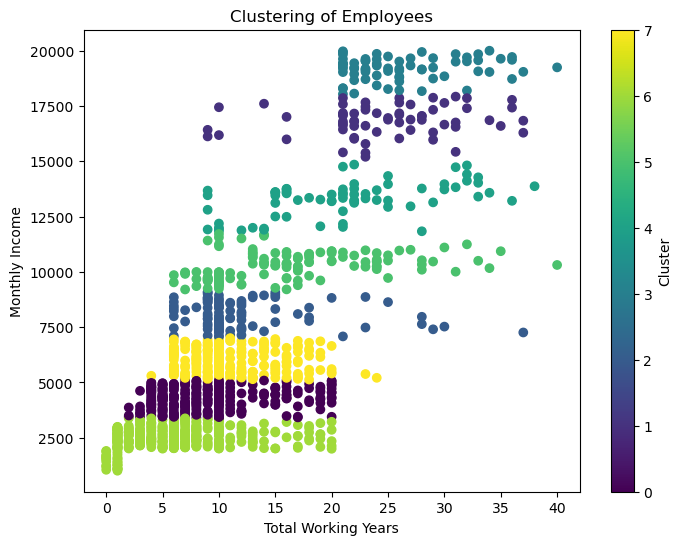

In [25]:
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

# Assuming 'data_cleaned' is your DataFrame
X = data_cleaned

# Define numerical and categorical features
numerical_features = ['MonthlyIncome', 'TotalWorkingYears']
categorical_features = ['Department', 'Education', 'EducationField', 'JobLevel', 'PerformanceRating', 'WorkLifeBalance']

# One-hot encoding categorical variables
X_encoded = pd.get_dummies(X[categorical_features])

# Combine numerical and one-hot encoded categorical data
X_combined = pd.concat([X[numerical_features], X_encoded], axis=1)

# Indices of categorical columns in the combined DataFrame
categorical_indices = list(range(len(numerical_features), len(X_combined.columns)))

# Convert DataFrame to numpy array for K-Prototypes
X_array = X_combined.values

# Apply K-Prototypes clustering
n_clusters = 8  # Total Job Roles that exist
kproto = KPrototypes(n_clusters=n_clusters, init='Cao', n_init=6, verbose=1, random_state=42)
clusters = kproto.fit_predict(X_array, categorical=categorical_indices)

# Evaluate the clustering using silhouette score
silhouette_avg = silhouette_score(X_array, clusters, metric='euclidean')
print(f'Silhouette Score: {silhouette_avg}')
print('ARI Score: {:.5f}'.format(adjusted_rand_score(X["JobRole"],clusters)))

# Add the cluster information to the original dataframe for visualization
data_cleaned['Cluster'] = clusters

# Visualize the clustering
plt.figure(figsize=(8, 6))
plt.scatter(data_cleaned['TotalWorkingYears'], data_cleaned['MonthlyIncome'], c=data_cleaned['Cluster'], cmap='viridis', marker='o')
plt.title('Clustering of Employees')
plt.xlabel('Total Working Years')
plt.ylabel('Monthly Income')
plt.colorbar(label='Cluster')
plt.show()

We used KPrototypes model since we are trying to cluster our dataset based on both numerical and categorical variables which is more effective compared to other models such as K-Means, K-Modes, and DBScan. The model scored about 0.60 in terms of silhouette score which suggest that on average, samples are appropriately placed in their own clusters, and the clusters are well separated.To compare the actual labeling by Job Roles we also measure the ARI score that has a value of 0.20 which considered low, indicating that there is a slight agreement between the clustering and the true labels, but it is not strong. This suggests that while the clusters are separated to some extent (as indicated by the silhouette score), they do not match well with the true labels that you have for your data.

## Conclusions:

1. **Employee Attrition Prediction:** The ability to predict employee turnover is pivotal for assessing organizational fit and retaining talent. Machine learning models, particularly Logistic Regression and SVM, have demonstrated commendable predictive capabilities in this regard.

2. **Employee Relationship Satisfaction:** Although the initial models did not outperform the random chance in predicting relationship satisfaction, there is potential for further model refinement or the application of alternative analytical strategies.

3. **Job Satisfaction Prediction:** The models did not significantly outperform a random-chance predictor in distinguishing between levels of job satisfaction. This suggests a need for more nuanced feature engineering or potentially different modeling techniques to capture the complexities of job satisfaction factors.

4. **Work-Life Balance Prediction:** Models showed a substantial improvement in predicting work-life balance, indicating the effectiveness of the chosen features and the potential utility of the models for estimating this aspect of employee well-being.

5. **Job Role Prediction:** The modest accuracy in predicting job roles, coupled with promising AUC-ROC scores, implies that models can effectively distinguish between different job roles at various thresholds. This presents an opportunity for clustering and unsupervised learning approaches to refine job role alignment strategies.

6. **Clustering for Job Role Alignment:** The use of KPrototypes clustering yielded a moderate silhouette score, suggesting adequately distinct clusters. However, the ARI score indicates that the clusters do not align closely with the actual job roles, signaling room for refinement in the clustering approach.

## Recommendations:

1. **Modeling Strategy Optimization:** For future model developments, consider a mixed approach that combines the robustness of ensemble methods with the precision of algorithms like SVM and Logistic Regression.

2. **Feature Engineering:** Prioritize domain-informed feature engineering to enhance model performance. Utilize techniques like Recursive Feature Elimination to identify and retain the most predictive features.

3. **Model Evaluation:** Extend model evaluation beyond conventional metrics. Implement cross-validation strategies and consider the business implications of model errors.

4. **Unsupervised Learning Exploration:** Investigate unsupervised learning techniques, like clustering, to uncover intrinsic groupings within the workforce that align with job roles and employee strengths.

5. **Domain Expert Integration:** Involve domain experts in the iterative cycle of model refinement to ensure the inclusion of nuanced factors that may influence model outcomes.

6. **Data Quality and Collection:** As data is central to the modeling process, invest in data collection and cleaning strategies to improve the quality and relevance of the dataset for future analyses.

# Chapter 2: Transitioning to Verifiable ML Model using Gizatech AI Actions and Transpiler

In this analysis, we concentrate on a critical issue confronting businesses in the current economic climate: employee attrition. To transition an existing Machine Learning (ML) model into a verifiable and robust one, we propose the application of Logistic Regression. This choice is grounded in the controversial yet significant nature of attrition prediction within the corporate sphere.

Logistic Regression, renowned for its efficacy in binary classification problems, is aptly suited for modeling employee attrition - a binary outcome (attrition or retention). Our focus on this methodology not only aligns with its analytical strengths but also addresses a crucial concern in contemporary business environments.

In [29]:
from giza_actions.action import Action, action
from giza_actions.task import task

# Define the target variable 'y' and features 'X'
y = data_cleaned['Attrition']
X = data_cleaned.drop('Attrition', axis=1)

# List of numerical and categorical columns
numerical_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 
                  'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 
                  'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 
                  'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 
                  'YearsWithCurrManager']
categorical_cols = ['BusinessTravel', 'Department', 'Education', 'EducationField', 
                    'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 
                    'JobRole', 'JobSatisfaction', 'MaritalStatus', 'PerformanceRating', 
                    'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance','OverTime']

@task(name=f"Split Dataset")
def split_dataset(X, y):
    # Splitting the dataset into training and testing sets, stratified based on the 'Attrition' column
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    # Displaying the shapes of the training and testing sets
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    return X_train, X_test, y_train, y_test

In [30]:
@task(name=f"Preprocess & Transform Dataset")
def preprocess_dataset(X_train, X_test, y_train, y_test):
    # Create a column transformer for preprocessing
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_cols),
            ('cat', OneHotEncoder(), categorical_cols)
        ])

    # Fit and transform the training data
    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)
    y_train = y_train.apply(lambda x: 0 if x == 'No' else 1)
    y_test = y_test.apply(lambda x: 0 if x == 'No' else 1)
    return X_train_processed, X_test_processed, y_train, y_test

@task(name=f"Training Model")
def train_model(model, X_train, y_train):
    print("Traning the model...")
    model.fit(X_train, y_train)
    print("Model trained sucessfully");
    return model

@task(name=f"Testing Model")
def test_model(model, X_test, y_test):
    """
    Test a machine learning model and evaluate its performance.

    Parameters:
    model: The machine learning model to be tested.
    X_test: Test data.
    y_test: True labels for test data.

    Returns:
    Tuple of (accuracy, F1 score, ROC-AUC score, predicted probabilities)
    """
    print("Testing the model...")
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC curve

    # Performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
      
    #Print the result of the performance metrics line by line 
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC Score: {roc_auc:.4f}")
      
    print("Done testing the model...")
    return accuracy, f1, roc_auc, y_proba

@action(name=f"Execution", log_prints=True)
def execution():
    X_train, X_test, y_train, y_test = split_dataset(X, y)
    X_train_processed, X_test_processed, y_train, y_test = preprocess_dataset(X_train, X_test, y_train, y_test)
    
    #Create a Logistic Regression Model
    logreg = LogisticRegression(random_state=42)
    model = train_model(logreg, X_train_processed, y_train)
    test_model(model, X_test_processed, y_test)
    
execution() #Execute action

16:11:17.928 | INFO    | Created flow run 'grumpy-bobcat' for flow 'Execution'

16:11:17.935 | INFO    | Action run 'grumpy-bobcat' - View at https://actions-server-aronenibai789-dblzzhtf5q-ew.a.run.app/flow-runs/flow-run/d8c86020-3732-42bc-8e48-cd0ed7a03672

16:11:20.910 | INFO    | Action run 'grumpy-bobcat' - Created task run 'Split Dataset-0' for task 'Split Dataset'

16:11:20.915 | INFO    | Action run 'grumpy-bobcat' - Executing 'Split Dataset-0' immediately...

16:11:21.994 | INFO    | Task run 'Split Dataset-0' - (1176, 31) (294, 31) (1176,) (294,)

16:11:22.388 | INFO    | Task run 'Split Dataset-0' - Finished in state Completed()

16:11:22.761 | INFO    | Action run 'grumpy-bobcat' - Created task run 'Preprocess & Transform Dataset-0' for task 'Preprocess & Transform Dataset'

16:11:22.765 | INFO    | Action run 'grumpy-bobcat' - Executing 'Preprocess & Transform Dataset-0' immediately...

16:11:23.917 | INFO    | Task run 'Preprocess & Transform Dataset-0' - Finished in state Completed()

16:11:24.286 | INFO    | Action run 'grumpy-bobcat' - Created task run 'Training Model-0' for task 'Training Model'

16:11:24.290 | INFO    | Action run 'grumpy-bobcat' - Executing 'Training Model-0' immediately...

16:11:25.016 | INFO    | Task run 'Training Model-0' - Traning the model...

16:11:25.097 | INFO    | Task run 'Training Model-0' - Model trained sucessfully

16:11:25.468 | INFO    | Task run 'Training Model-0' - Finished in state Completed()

16:11:25.882 | INFO    | Action run 'grumpy-bobcat' - Created task run 'Testing Model-0' for task 'Testing Model'

16:11:25.886 | INFO    | Action run 'grumpy-bobcat' - Executing 'Testing Model-0' immediately...

16:11:26.598 | INFO    | Task run 'Testing Model-0' - Testing the model...

16:11:26.613 | INFO    | Task run 'Testing Model-0' - Accuracy: 0.8776

16:11:26.617 | INFO    | Task run 'Testing Model-0' - F1 Score: 0.5135

16:11:26.619 | INFO    | Task run 'Testing Model-0' - ROC-AUC Score: 0.8434

16:11:26.622 | INFO    | Task run 'Testing Model-0' - Done testing the model...

16:11:27.016 | INFO    | Task run 'Testing Model-0' - Finished in state Completed()

16:11:27.398 | INFO    | Action run 'grumpy-bobcat' - Finished in state Completed('All states completed.')

[Completed(message=None, type=COMPLETED, result=UnpersistedResult(type='unpersisted', artifact_type='result', artifact_description='Unpersisted result of type `tuple`')),
 Completed(message=None, type=COMPLETED, result=UnpersistedResult(type='unpersisted', artifact_type='result', artifact_description='Unpersisted result of type `tuple`')),
 Completed(message=None, type=COMPLETED, result=UnpersistedResult(type='unpersisted', artifact_type='result', artifact_description='Unpersisted result of type `LogisticRegression`')),
 Completed(message=None, type=COMPLETED, result=UnpersistedResult(type='unpersisted', artifact_type='result', artifact_description='Unpersisted result of type `tuple`'))]

In [31]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
import onnx

@task(name=f"Convert LogReg Model to ONNX")
def convert_logreg_to_onnx(model, onnx_file_path):
    """
    Convert a scikit-learn Logistic Regression model to ONNX format.

    Parameters:
    model (sklearn.linear_model.LogisticRegression): The Logistic Regression model to convert.
    onnx_file_path (str): The file path where the ONNX model will be saved.
    """
    # Check initial types - assuming model is for classification on float features
    # You might need to adjust this depending on your model input
    initial_type = [('float_input', FloatTensorType([None, model.n_features_in_]))]
    
    # Convert the model
    onnx_model = convert_sklearn(model, initial_types=initial_type)

    # Save to file
    with open(onnx_file_path, "wb") as f:
        f.write(onnx_model.SerializeToString())

    print(f"Model saved to {onnx_file_path}")

In [32]:
@action(name=f"Action: Convert To ONNX", log_prints=True)
def logreg_to_onnx_execution():

    X_train, X_test, y_train, y_test = split_dataset(X, y)
    X_train_processd, X_test_processed, y_train, y_test = preprocess_dataset(X_train, X_test, y_train, y_test)
    # Create a Logistic Regression Model
    logreg = LogisticRegression(random_state=42)
    model = train_model(logreg, X_train_processd, y_train)
    test_model(model, X_test_processed, y_test)
    
    onnx_file_path = "logreg_attrition_model.onnx"
    convert_logreg_to_onnx(model, onnx_file_path)

logreg_to_onnx_execution()

16:11:31.101 | INFO    | Created flow run 'meaty-cow' for flow 'Action: Convert To ONNX'

16:11:31.107 | INFO    | Action run 'meaty-cow' - View at https://actions-server-aronenibai789-dblzzhtf5q-ew.a.run.app/flow-runs/flow-run/642dca56-134e-4788-8d8d-3dea6355b12a

16:11:32.200 | INFO    | Action run 'meaty-cow' - Created task run 'Split Dataset-0' for task 'Split Dataset'

16:11:32.204 | INFO    | Action run 'meaty-cow' - Executing 'Split Dataset-0' immediately...

16:11:33.271 | INFO    | Task run 'Split Dataset-0' - (1176, 31) (294, 31) (1176,) (294,)

16:11:33.706 | INFO    | Task run 'Split Dataset-0' - Finished in state Completed()

16:11:34.082 | INFO    | Action run 'meaty-cow' - Created task run 'Preprocess & Transform Dataset-0' for task 'Preprocess & Transform Dataset'

16:11:34.085 | INFO    | Action run 'meaty-cow' - Executing 'Preprocess & Transform Dataset-0' immediately...

16:11:35.224 | INFO    | Task run 'Preprocess & Transform Dataset-0' - Finished in state Completed()

16:11:35.588 | INFO    | Action run 'meaty-cow' - Created task run 'Training Model-0' for task 'Training Model'

16:11:35.592 | INFO    | Action run 'meaty-cow' - Executing 'Training Model-0' immediately...

16:11:36.327 | INFO    | Task run 'Training Model-0' - Traning the model...

16:11:36.407 | INFO    | Task run 'Training Model-0' - Model trained sucessfully

16:11:36.789 | INFO    | Task run 'Training Model-0' - Finished in state Completed()

16:11:37.164 | INFO    | Action run 'meaty-cow' - Created task run 'Testing Model-0' for task 'Testing Model'

16:11:37.166 | INFO    | Action run 'meaty-cow' - Executing 'Testing Model-0' immediately...

16:11:37.887 | INFO    | Task run 'Testing Model-0' - Testing the model...

16:11:37.903 | INFO    | Task run 'Testing Model-0' - Accuracy: 0.8776

16:11:37.908 | INFO    | Task run 'Testing Model-0' - F1 Score: 0.5135

16:11:37.912 | INFO    | Task run 'Testing Model-0' - ROC-AUC Score: 0.8434

16:11:37.916 | INFO    | Task run 'Testing Model-0' - Done testing the model...

16:11:38.292 | INFO    | Task run 'Testing Model-0' - Finished in state Completed()

16:11:38.665 | INFO    | Action run 'meaty-cow' - Created task run 'Convert LogReg Model to ONNX-0' for task 'Convert LogReg Model to ONNX'

16:11:38.668 | INFO    | Action run 'meaty-cow' - Executing 'Convert LogReg Model to ONNX-0' immediately...

16:11:39.426 | INFO    | Task run 'Convert LogReg Model to ONNX-0' - Model saved to logreg_attrition_model.onnx

16:11:39.804 | INFO    | Task run 'Convert LogReg Model to ONNX-0' - Finished in state Completed()

16:11:40.212 | INFO    | Action run 'meaty-cow' - Finished in state Completed('All states completed.')

[Completed(message=None, type=COMPLETED, result=UnpersistedResult(type='unpersisted', artifact_type='result', artifact_description='Unpersisted result of type `tuple`')),
 Completed(message=None, type=COMPLETED, result=UnpersistedResult(type='unpersisted', artifact_type='result', artifact_description='Unpersisted result of type `tuple`')),
 Completed(message=None, type=COMPLETED, result=UnpersistedResult(type='unpersisted', artifact_type='result', artifact_description='Unpersisted result of type `LogisticRegression`')),
 Completed(message=None, type=COMPLETED, result=UnpersistedResult(type='unpersisted', artifact_type='result', artifact_description='Unpersisted result of type `tuple`')),
 Completed(message=None, type=COMPLETED, result=UnpersistedResult(type='unpersisted', artifact_type='result', artifact_description='Unpersisted result of type `NoneType`'))]

Let's look on the operators used by our model on an onnx format and seed if it loads properly.

In [33]:
import onnx

# Load the ONNX model
model = onnx.load("logreg_attrition_model.onnx")

# Iterate through each node in the model's graph
for node in model.graph.node:
    print(f"Operator Type: {node.op_type}")
    # Optionally, print more details about the node
    print(f"Input(s): {node.input}, Output(s): {node.output}")
    print("---")

Operator Type: LinearClassifier
Input(s): ['float_input'], Output(s): ['label', 'probability_tensor']
---
Operator Type: Cast
Input(s): ['label'], Output(s): ['output_label']
---
Operator Type: Normalizer
Input(s): ['probability_tensor'], Output(s): ['probabilities']
---
Operator Type: ZipMap
Input(s): ['probabilities'], Output(s): ['output_probability']
---


The operators used on the model are currently not supported with gizatech's transpiler. Thus we need to port our solution by using pytorch instead of sklearn for creating a neural network model. Since we are targeting the attrition of employees, we must check if the classes that we are trying to predict is balanced. If it's not the we will proceed with synthetic data generation to balance the dataset.

In [34]:
#Checking if the classess are balance
class_to_predict = data_cleaned["Attrition"]
class_to_predict.value_counts(normalize = True)

Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64

Since the dataset is heavily imbalanced, we will perform SMOTE on our training data.

In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
from imblearn.over_sampling import SMOTE

class LogReg(nn.Module):
    def __init__(self, input_size):
        super(LogReg, self).__init__()
        self.linear = nn.Linear(input_size, 1)
        self.activation = torch.sigmoid  # or nn.ReLU()

    def forward(self, x):
        return self.activation(self.linear(x))

@task(name=f"Initialize Model")
def initialize_model(input_size):
    # Initialize the model
    model = LogReg(input_size)

    # Define the loss function and optimizer
    criterion = nn.BCELoss()  # or nn.BCEWithLogitsLoss() if using ReLU
    learning_rate = 0.01  # Set an appropriate learning rate
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    return model, criterion, optimizer

# Convert features and labels to tensors of type float32
@task(name=f"Convert Features and Labels")
def convert_features_labels(X, y):
    inputs = torch.tensor(X.astype('float32'))
    labels = torch.tensor(y.values.astype('float32')).view(-1, 1)
    
    return inputs, labels

@task(name=f"Synthetic Data Generation")
def synthetic_data_generation(X_train, y_train):
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    return X_train_smote, y_train_smote

# Training loop
@task(name=f"Train Model")
def train_model(model, criterion, optimizer, inputs, labels, num_epochs = 100): #default epochs 100
    for epoch in range(num_epochs):
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print loss every few epochs
        if epoch % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

    print("✅ Model trained successfully")

C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [36]:
#For testing
from sklearn.metrics import accuracy_score, f1_score

@task(name=f"Test model")
def test_model(model, inputs_test, labels_test):
    print("Testing model...")
    # Set the model to evaluation mode
    model.eval()

    # Disable gradient calculations
    with torch.no_grad():
        outputs_test = model(inputs_test)

    # Convert outputs to binary predictions
    predicted = (outputs_test > 0.5).float()

    # Calculate accuracy and F1 score
    accuracy = accuracy_score(labels_test.numpy(), predicted.numpy())
    f1 = f1_score(labels_test.numpy(), predicted.numpy())

    print("✅ Model tested successfully")
    print(f'Accuracy: {accuracy:.4f}')
    print(f'F1 Score: {f1:.4f}')

In [37]:
input_size = 0 #initialize input size

@action(name=f"Exectuion: Logistic Regression Prediction", log_prints=True)
def execution():
    print("Execution: Model Training and Testing")
    y = data_cleaned['Attrition']
    X = data_cleaned.drop('Attrition', axis=1)
    X_train, X_test, y_train, y_test = split_dataset(X, y)
    X_train_processed, X_test_processed, y_train, y_test = preprocess_dataset(X_train, X_test, y_train, y_test)
    input_size = X_train_processed.shape[1]
    X_train_smote, y_train_smote = synthetic_data_generation(X_train_processed, y_train)
    print(f"Model Input Size: {input_size}")
    model, criterion, optimizer = initialize_model(input_size) #initialize model
    
    X_inputs_train, y_labels_train = convert_features_labels(X_train_smote, y_train_smote)
    train_model(model, criterion, optimizer, X_inputs_train, y_labels_train, 500)
    X_inputs_test, y_labels_test = convert_features_labels(X_test_processed, y_test)
    test_model(model, X_inputs_test, y_labels_test)
    print("Testing Done...")
    return model, input_size
    
model, input_size = execution()

16:11:48.657 | INFO    | Created flow run 'hallowed-partridge' for flow 'Exectuion: Logistic Regression Prediction'

16:11:48.662 | INFO    | Action run 'hallowed-partridge' - View at https://actions-server-aronenibai789-dblzzhtf5q-ew.a.run.app/flow-runs/flow-run/923a73be-de27-4899-8801-51d559ede7fd

16:11:50.263 | INFO    | Action run 'hallowed-partridge' - Execution: Model Training and Testing

16:11:51.511 | INFO    | Action run 'hallowed-partridge' - Created task run 'Split Dataset-0' for task 'Split Dataset'

16:11:51.515 | INFO    | Action run 'hallowed-partridge' - Executing 'Split Dataset-0' immediately...

16:11:53.120 | INFO    | Task run 'Split Dataset-0' - (1176, 31) (294, 31) (1176,) (294,)

16:11:53.500 | INFO    | Task run 'Split Dataset-0' - Finished in state Completed()

16:11:53.854 | INFO    | Action run 'hallowed-partridge' - Created task run 'Preprocess & Transform Dataset-0' for task 'Preprocess & Transform Dataset'

16:11:53.857 | INFO    | Action run 'hallowed-partridge' - Executing 'Preprocess & Transform Dataset-0' immediately...

16:11:55.023 | INFO    | Task run 'Preprocess & Transform Dataset-0' - Finished in state Completed()

16:11:55.396 | INFO    | Action run 'hallowed-partridge' - Created task run 'Synthetic Data Generation-0' for task 'Synthetic Data Generation'

16:11:55.399 | INFO    | Action run 'hallowed-partridge' - Executing 'Synthetic Data Generation-0' immediately...

16:11:56.517 | INFO    | Task run 'Synthetic Data Generation-0' - Finished in state Completed()

16:11:56.521 | INFO    | Action run 'hallowed-partridge' - Model Input Size: 78

16:11:56.885 | INFO    | Action run 'hallowed-partridge' - Created task run 'Initialize Model-0' for task 'Initialize Model'

16:11:56.888 | INFO    | Action run 'hallowed-partridge' - Executing 'Initialize Model-0' immediately...

16:12:00.216 | INFO    | Task run 'Initialize Model-0' - Finished in state Completed()

16:12:00.588 | INFO    | Action run 'hallowed-partridge' - Created task run 'Convert Features and Labels-0' for task 'Convert Features and Labels'

16:12:00.592 | INFO    | Action run 'hallowed-partridge' - Executing 'Convert Features and Labels-0' immediately...

16:12:01.707 | INFO    | Task run 'Convert Features and Labels-0' - Finished in state Completed()

16:12:02.086 | INFO    | Action run 'hallowed-partridge' - Created task run 'Train Model-0' for task 'Train Model'

16:12:02.090 | INFO    | Action run 'hallowed-partridge' - Executing 'Train Model-0' immediately...

16:12:02.862 | INFO    | Task run 'Train Model-0' - Epoch [1/500], Loss: 0.7026

16:12:02.881 | INFO    | Task run 'Train Model-0' - Epoch [11/500], Loss: 0.6854

16:12:02.892 | INFO    | Task run 'Train Model-0' - Epoch [21/500], Loss: 0.6707

16:12:02.905 | INFO    | Task run 'Train Model-0' - Epoch [31/500], Loss: 0.6579

16:12:02.917 | INFO    | Task run 'Train Model-0' - Epoch [41/500], Loss: 0.6468

16:12:02.931 | INFO    | Task run 'Train Model-0' - Epoch [51/500], Loss: 0.6371

16:12:02.943 | INFO    | Task run 'Train Model-0' - Epoch [61/500], Loss: 0.6285

16:12:02.956 | INFO    | Task run 'Train Model-0' - Epoch [71/500], Loss: 0.6209

16:12:02.967 | INFO    | Task run 'Train Model-0' - Epoch [81/500], Loss: 0.6140

16:12:02.978 | INFO    | Task run 'Train Model-0' - Epoch [91/500], Loss: 0.6078

16:12:02.990 | INFO    | Task run 'Train Model-0' - Epoch [101/500], Loss: 0.6022

16:12:03.002 | INFO    | Task run 'Train Model-0' - Epoch [111/500], Loss: 0.5970

16:12:03.014 | INFO    | Task run 'Train Model-0' - Epoch [121/500], Loss: 0.5923

16:12:03.026 | INFO    | Task run 'Train Model-0' - Epoch [131/500], Loss: 0.5879

16:12:03.039 | INFO    | Task run 'Train Model-0' - Epoch [141/500], Loss: 0.5838

16:12:03.051 | INFO    | Task run 'Train Model-0' - Epoch [151/500], Loss: 0.5800

16:12:03.064 | INFO    | Task run 'Train Model-0' - Epoch [161/500], Loss: 0.5764

16:12:03.076 | INFO    | Task run 'Train Model-0' - Epoch [171/500], Loss: 0.5730

16:12:03.088 | INFO    | Task run 'Train Model-0' - Epoch [181/500], Loss: 0.5697

16:12:03.100 | INFO    | Task run 'Train Model-0' - Epoch [191/500], Loss: 0.5667

16:12:03.113 | INFO    | Task run 'Train Model-0' - Epoch [201/500], Loss: 0.5637

16:12:03.124 | INFO    | Task run 'Train Model-0' - Epoch [211/500], Loss: 0.5610

16:12:03.135 | INFO    | Task run 'Train Model-0' - Epoch [221/500], Loss: 0.5583

16:12:03.146 | INFO    | Task run 'Train Model-0' - Epoch [231/500], Loss: 0.5557

16:12:03.157 | INFO    | Task run 'Train Model-0' - Epoch [241/500], Loss: 0.5532

16:12:03.169 | INFO    | Task run 'Train Model-0' - Epoch [251/500], Loss: 0.5508

16:12:03.180 | INFO    | Task run 'Train Model-0' - Epoch [261/500], Loss: 0.5485

16:12:03.191 | INFO    | Task run 'Train Model-0' - Epoch [271/500], Loss: 0.5463

16:12:03.204 | INFO    | Task run 'Train Model-0' - Epoch [281/500], Loss: 0.5442

16:12:03.214 | INFO    | Task run 'Train Model-0' - Epoch [291/500], Loss: 0.5421

16:12:03.226 | INFO    | Task run 'Train Model-0' - Epoch [301/500], Loss: 0.5400

16:12:03.238 | INFO    | Task run 'Train Model-0' - Epoch [311/500], Loss: 0.5381

16:12:03.249 | INFO    | Task run 'Train Model-0' - Epoch [321/500], Loss: 0.5361

16:12:03.261 | INFO    | Task run 'Train Model-0' - Epoch [331/500], Loss: 0.5343

16:12:03.273 | INFO    | Task run 'Train Model-0' - Epoch [341/500], Loss: 0.5324

16:12:03.284 | INFO    | Task run 'Train Model-0' - Epoch [351/500], Loss: 0.5307

16:12:03.298 | INFO    | Task run 'Train Model-0' - Epoch [361/500], Loss: 0.5289

16:12:03.307 | INFO    | Task run 'Train Model-0' - Epoch [371/500], Loss: 0.5272

16:12:03.319 | INFO    | Task run 'Train Model-0' - Epoch [381/500], Loss: 0.5256

16:12:03.329 | INFO    | Task run 'Train Model-0' - Epoch [391/500], Loss: 0.5240

16:12:03.340 | INFO    | Task run 'Train Model-0' - Epoch [401/500], Loss: 0.5224

16:12:03.351 | INFO    | Task run 'Train Model-0' - Epoch [411/500], Loss: 0.5208

16:12:03.363 | INFO    | Task run 'Train Model-0' - Epoch [421/500], Loss: 0.5193

16:12:03.373 | INFO    | Task run 'Train Model-0' - Epoch [431/500], Loss: 0.5179

16:12:03.384 | INFO    | Task run 'Train Model-0' - Epoch [441/500], Loss: 0.5164

16:12:03.395 | INFO    | Task run 'Train Model-0' - Epoch [451/500], Loss: 0.5150

16:12:03.405 | INFO    | Task run 'Train Model-0' - Epoch [461/500], Loss: 0.5136

16:12:03.418 | INFO    | Task run 'Train Model-0' - Epoch [471/500], Loss: 0.5122

16:12:03.427 | INFO    | Task run 'Train Model-0' - Epoch [481/500], Loss: 0.5109

16:12:03.438 | INFO    | Task run 'Train Model-0' - Epoch [491/500], Loss: 0.5096

16:12:03.448 | INFO    | Task run 'Train Model-0' - ✅ Model trained successfully

16:12:03.833 | INFO    | Task run 'Train Model-0' - Finished in state Completed()

16:12:04.208 | INFO    | Action run 'hallowed-partridge' - Created task run 'Convert Features and Labels-1' for task 'Convert Features and Labels'

16:12:04.211 | INFO    | Action run 'hallowed-partridge' - Executing 'Convert Features and Labels-1' immediately...

16:12:05.356 | INFO    | Task run 'Convert Features and Labels-1' - Finished in state Completed()

16:12:05.736 | INFO    | Action run 'hallowed-partridge' - Created task run 'Test model-0' for task 'Test model'

16:12:05.738 | INFO    | Action run 'hallowed-partridge' - Executing 'Test model-0' immediately...

16:12:06.487 | INFO    | Task run 'Test model-0' - Testing model...

16:12:06.500 | INFO    | Task run 'Test model-0' - ✅ Model tested successfully

16:12:06.503 | INFO    | Task run 'Test model-0' - Accuracy: 0.7245

16:12:06.506 | INFO    | Task run 'Test model-0' - F1 Score: 0.4906

16:12:06.892 | INFO    | Task run 'Test model-0' - Finished in state Completed()

16:12:06.895 | INFO    | Action run 'hallowed-partridge' - Testing Done...

16:12:07.286 | INFO    | Action run 'hallowed-partridge' - Finished in state Completed()

In [38]:
import torch
import torch.onnx

@action(name="Model Conversion to ONNX")
def onnx_model_conversion():
    # Assuming 'input_size' is the size of model's input
    dummy_input = torch.randn(78, input_size, dtype=torch.float32)

    # Set the model to evaluation mode
    model.eval()

    # Export the model
    torch.onnx.export(model,               # model being run
                      dummy_input,         # model input (or a tuple for multiple inputs)
                      "logreg_attrition_model.onnx",        # where to save the model (can be a file or file-like object)
                      export_params=True,  # store the trained parameter weights inside the model file
                      opset_version=10,    # the ONNX version to export the model to
                      do_constant_folding=True,  # whether to execute constant folding for optimization
                      input_names = ['input'],   # the model's input names
                      output_names = ['output'], # the model's output names
                      dynamic_axes={'input' : {0 : 'batch_size'},    # variable length axes
                                    'output' : {0 : 'batch_size'}})
    
onnx_model_conversion()

16:12:10.030 | INFO    | Created flow run 'messy-orangutan' for flow 'Model Conversion to ONNX'

16:12:10.034 | INFO    | Action run 'messy-orangutan' - View at https://actions-server-aronenibai789-dblzzhtf5q-ew.a.run.app/flow-runs/flow-run/1ff1dee2-4a18-4791-9a92-93012de69b16

16:12:12.928 | INFO    | Action run 'messy-orangutan' - Finished in state Completed()

In [39]:
import onnx

# Reading the ONNX model from file
loaded_model = onnx.load("logreg_attrition_model.onnx")

# Looping over all nodes within the model graph
for each_node in loaded_model.graph.node:
    print(f"Node Type: {each_node.op_type}")  # Displaying the type of operation for each node
    # Display additional information about each node
    print(f"Node Inputs: {each_node.input}, Node Outputs: {each_node.output}")
    print("===")  # Separator for readability

Node Type: Gemm
Node Inputs: ['input', 'linear.weight', 'linear.bias'], Node Outputs: ['/linear/Gemm_output_0']
===
Node Type: Sigmoid
Node Inputs: ['/linear/Gemm_output_0'], Node Outputs: ['output']
===


## Levaraging Giza Model for Creating Verifiable Predictions

In [43]:
from giza_actions.model import GizaModel

MODEL_ID = 281  # Update with your model ID
VERSION_ID = 10  # Update with your version ID

@task(name='Cairo Model Forecast')
def generate_forecast(input_data, unique_model_id, specific_version_id):
    # Setting up the GizaModel instance with specified model and version identifiers.
    forecasting_model = GizaModel(
        id=unique_model_id,
        version=specific_version_id
    )
    
    # Executing the predict method, ensuring the output is verifiable.
    # Also, specify the expected type of output.
    (forecast_result, tracking_id) = forecasting_model.predict(
        input_feed={"InputData": input_data}, 
        verifiable=True
    )
    print(forecast_result)
    print(tracking_id)
    return (forecast_result, tracking_id)

@action(name='Forecast Execution via Cairo', log_prints=True)
def run_forecast():
    y = data_cleaned['Attrition']
    X = data_cleaned.drop('Attrition', axis=1)
    X_train, X_test, y_train, y_test = split_dataset(X, y)
    X_train_processed, X_test_processed, y_train, y_test = preprocess_dataset(X_train, X_test, y_train, y_test)
    X_test_processed_test_data = X_test_processed[1].astype('float32').reshape(1, -1)
    ## Extracting a single data point from input for prediction
    (forecast_output, tracking_code) = generate_forecast(X_test_processed_test_data, MODEL_ID, VERSION_ID ) 
    return forecast_output, tracking_code

run_forecast()

C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\prefect\tasks.py:337: UserWarning: A task named 'Cairo Model Forecast' and defined at 'C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\giza_actions\task.py:6' conflicts with another task. Consider specifying a unique `name` parameter in the task definition:

 `@task(name='my_unique_name', ...)`
  warnings.warn(
C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\prefect\flows.py:338: UserWarning: A flow named 'Forecast Execution via Cairo' and defined at 'C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\giza_actions\action.py:24' conflicts with another flow. Consider specifying a unique `name` parameter in the flow definition:

 `@flow(name='my_unique_name', ...)`
  warnings.warn(


16:14:31.153 | INFO    | Created flow run 'hypnotic-tody' for flow 'Forecast Execution via Cairo'

16:14:31.158 | INFO    | Action run 'hypnotic-tody' - View at https://actions-server-aronenibai789-dblzzhtf5q-ew.a.run.app/flow-runs/flow-run/468d13ff-d1ef-4de5-90b3-0e98e47b2fe8

16:14:32.229 | INFO    | Action run 'hypnotic-tody' - Created task run 'Split Dataset-0' for task 'Split Dataset'

16:14:32.232 | INFO    | Action run 'hypnotic-tody' - Executing 'Split Dataset-0' immediately...

16:14:33.296 | INFO    | Task run 'Split Dataset-0' - (1176, 31) (294, 31) (1176,) (294,)

16:14:33.683 | INFO    | Task run 'Split Dataset-0' - Finished in state Completed()

16:14:34.055 | INFO    | Action run 'hypnotic-tody' - Created task run 'Preprocess & Transform Dataset-0' for task 'Preprocess & Transform Dataset'

16:14:34.059 | INFO    | Action run 'hypnotic-tody' - Executing 'Preprocess & Transform Dataset-0' immediately...

16:14:35.214 | INFO    | Task run 'Preprocess & Transform Dataset-0' - Finished in state Completed()

16:14:35.606 | INFO    | Action run 'hypnotic-tody' - Created task run 'Cairo Model Forecast-0' for task 'Cairo Model Forecast'

16:14:35.609 | INFO    | Action run 'hypnotic-tody' - Executing 'Cairo Model Forecast-0' immediately...

🚀 Starting deserialization process...
✅ Deserialization completed! 🎉


16:14:41.854 | INFO    | Task run 'Cairo Model Forecast-0' - [[0.24458313]]

16:14:41.857 | INFO    | Task run 'Cairo Model Forecast-0' - "2eabd8253f0a4c72b0f41614ff69bd83"

16:14:42.257 | INFO    | Task run 'Cairo Model Forecast-0' - Finished in state Completed()

16:14:42.649 | INFO    | Action run 'hypnotic-tody' - Finished in state Completed()

(array([[0.24458313]]), '"2eabd8253f0a4c72b0f41614ff69bd83"')

In [47]:
import requests
import json
from giza import API_HOST

# Update the following variables with your specific details
MODEL_ID = 281  # Update with your model ID
VERSION_ID = 10  # Update with your version ID
DEPLOYMENT_ID = 14
REQUEST_ID = "2eabd8253f0a4c72b0f41614ff69bd83"
json_file_path = r"C:\Users\Predator\.giza\.api_key.json"
with open(json_file_path, 'r') as file:
    data = json.load(file)
API_KEY = data['api_key'] ##needed to be masked when uploaded to a github repo

url = f'{API_HOST}/api/v1/models/{MODEL_ID}/versions/{VERSION_ID}/deployments/{DEPLOYMENT_ID}/proofs/{REQUEST_ID}:download'
headers = {"X-API-KEY": API_KEY}
d_url = requests.get(url, headers=headers).json()["download_url"]
proof = requests.get(d_url)

with open("zk_attrition.proof", "wb") as f:
     f.write(proof.content)